In [ ]:
from math import factorial
from math import exp
from math import sqrt
import math
import matplotlib.pyplot as plt
from scipy. integrate import nquad
import numpy as np
import random

In [ ]:
def calculate_taylor(x, k):
  sum = 0
  for i in range (0, k+1):
      sum += ((x**i)/(factorial(i)))
  return sum

In [ ]:
calculate_taylor(1.5, 5)

4.46171875

In [ ]:
calculate_taylor(1.5, 6)

4.4775390625

In [ ]:
calculate_taylor(1.5, 7)

4.480929129464286

In [ ]:
exp(1.5)

4.4816890703380645

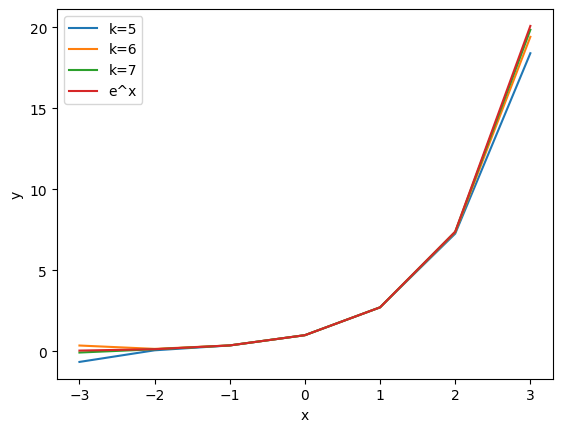

In [ ]:
#k = 5
x = [-3, -2, -1, 0, 1, 2, 3]

y = []
z = []
f = []
ex = []

for j in x:
  y.append(calculate_taylor(j, 5))
  z.append(calculate_taylor(j, 6))
  f.append(calculate_taylor(j, 7))
  ex.append(exp(j))

plt.plot(x, y, label="k=5")
plt.plot(x, z, label="k=6")
plt.plot(x, f, label="k=7")
plt.plot(x, ex, label="e^x")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def f(x, y, z) :
  return (x + y + z)/(sqrt(2*x**2 + 4*y**2 + 5*z**2))

def xbounds( ):
  return [0, 1]

def ybounds(x) :
  return [0, sqrt( 1- x**2)]

def zbounds(x, y):
  return [0, sqrt( 1- x**2- y**2)]

I = nquad(lambda z,y,x: f(x,y,z), [zbounds, ybounds, xbounds])


In [ ]:
print(I)

(0.4178153638027288, 1.4444117259783385e-08)


In [ ]:
def signal(x, A):
  if (x >= 0.0 and x <= 1.0):
    return A
  else:
    return 0

def xbounds():
  return [-1, 2]

A = 2
I = nquad(lambda x: signal(x, A), [xbounds])

In [ ]:
print(I)

(2.0, 2.220446049250313e-15)


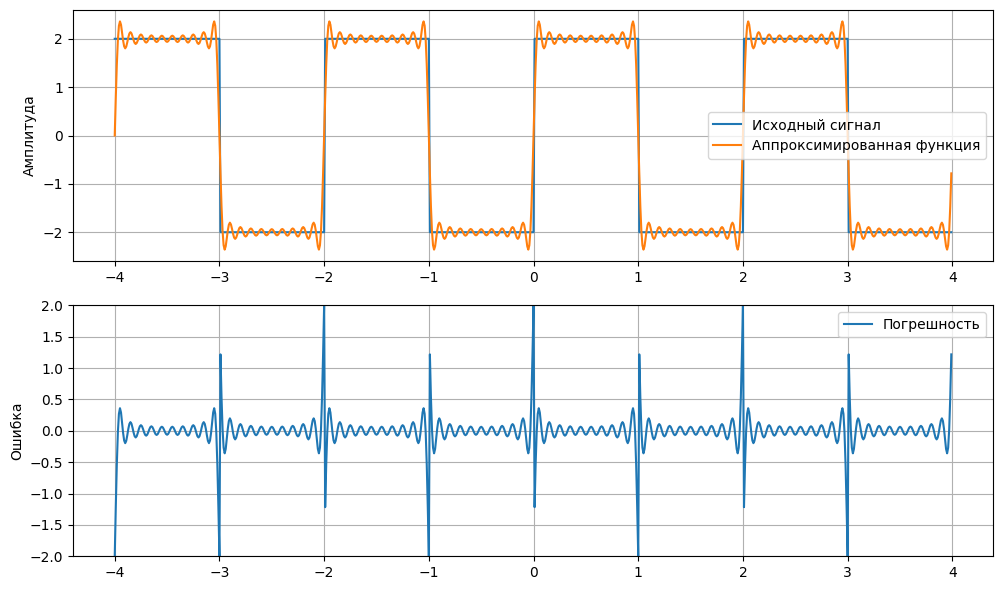

In [ ]:
A = 2
T = 2
N = 20
w = (2 * math.pi) / T
x = np.arange(-4, 4, 0.01)

def signal(x):
  if x % 2 <= 1:
      return 2
  return -2

def calculate_an(x, n):
  return signal(x) * math.cos(n * w * x)

def calculate_bn(x, n):
  return signal(x) * math.sin(n * w * x)

def calculate_taylor(x, k):
  sum = (2/T) * nquad(lambda t: calculate_an(t, 0), [[0, T]])[0]
  for n in range (1, N+1):
    sum += (2/T) * (nquad(lambda t: calculate_an(t, n), [[0, T]])[0] * math.cos(n * w * x) + nquad(lambda t: calculate_bn(t, n), [[0, T]])[0] * math.sin(n * w * x))
  return sum

y_approx = [calculate_taylor(x_i, N) for x_i in x]

y_signal = [signal(x_i) for x_i in x]
def signal(x):
  if x % 2 <= 1:
      return 2
  return -2

error = [y_approx[i] - y_signal[i] for i in range(len(x))]


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y_signal, label="Исходный сигнал")
plt.plot(x, y_approx, label="Аппроксимированная функция")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, error, label="Погрешность")
plt.ylabel("Ошибка")
plt.legend()
plt.grid(True)

plt.ylim(-2, 2)

plt.tight_layout()
plt.show()


In [ ]:
class Fourier:
    def __init__(self, signal, A, T, N, lower_bound, higher_bound):
        self.signal = signal
        self.A = A
        self.T = T
        self.N = N
        self.lower_bound = lower_bound
        self.higher_bound = higher_bound
        self.x = np.arange(lower_bound, higher_bound, 0.01)
        self.w = (2 * math.pi) / T
        self.an = []
        self.bn = []

    def calculate_an(self, x, n):
        return self.signal(x) * math.cos(n * self.w * x)

    def calculate_bn(self, x, n):
        return self.signal(x) * math.sin(n * self.w * x)

    def calculate_taylor(self, x, k):
        sum = (2/self.T) * nquad(lambda t: self.calculate_an(t, 0), [[0, self.T]])[0]
        self.an = []
        self.bn = []
        for n in range(1, self.N + 1):
            ani = (2/self.T) * nquad(lambda t: self.calculate_an(t, n), [[0, self.T]])[0]
            bni = (2/self.T) * nquad(lambda t: self.calculate_bn(t, n), [[0, self.T]])[0]
            sum += (2/self.T) * (ani * math.cos(n * self.w * x) + bni * math.sin(n * self.w * x))

            self.an.append(ani)
            self.bn.append(bni)
        return sum

    def show(self):
        noise = [random.random() for i in range(len(self.x))]
        self.x = self.x.tolist()
        y_approx = [self.calculate_taylor(x_i, self.N) for x_i in self.x] #ШУМ!
        y_signal = [self.signal(x_i) for x_i in self.x]
        error = [y_approx[i] - y_signal[i] for i in range(len(self.x))]

        plt.figure(figsize=(10, 6))

        plt.subplot(2, 1, 1)
        plt.plot(self.x, y_signal, label="Исходный сигнал")
        plt.plot(self.x, y_approx, label="Аппроксимированная функция")
        plt.ylabel("Амплитуда")
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(self.x, error, label="Погрешность")
        plt.ylabel("Ошибка")
        plt.legend()
        plt.grid(True)

        plt.ylim(-2, 2)

        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.plot(np.arange(1, self.N + 1), self.an, label="an")
        plt.xlabel("n")
        plt.ylabel("an")
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(np.arange(1, self.N + 1), self.bn, label="bn")
        plt.xlabel("n")
        plt.ylabel("bn")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

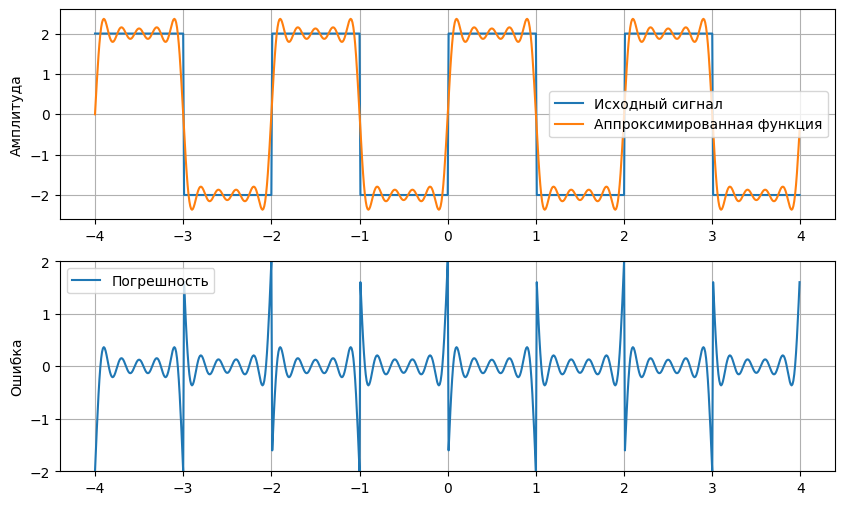

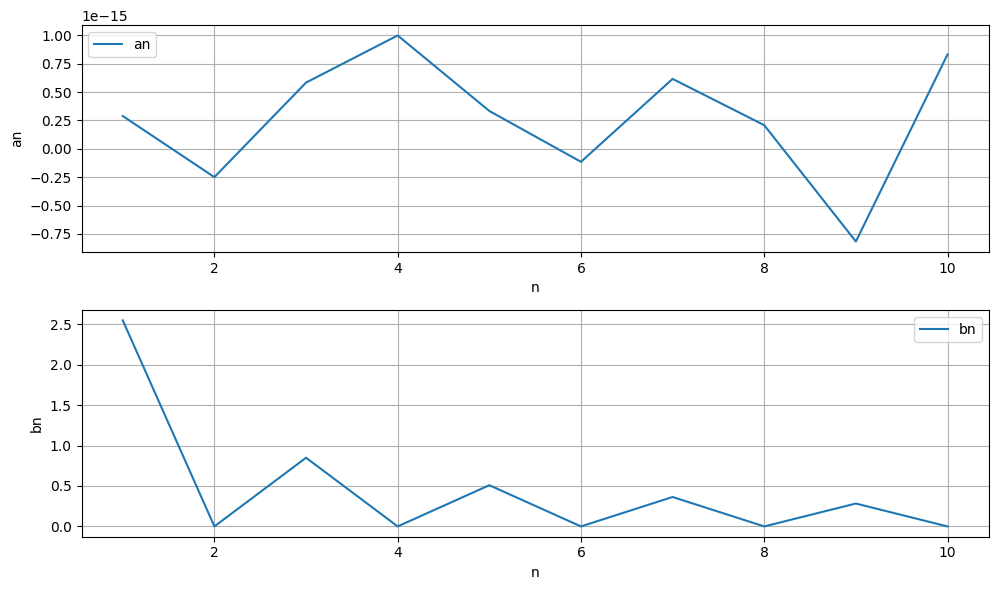

In [ ]:
def signal(x):
  if x % 2 <= 1:
      return 2
  return -2

fourier_signal = Fourier(signal, A=2, T=2, N=10, lower_bound=-4, higher_bound=4)
fourier_signal.show()

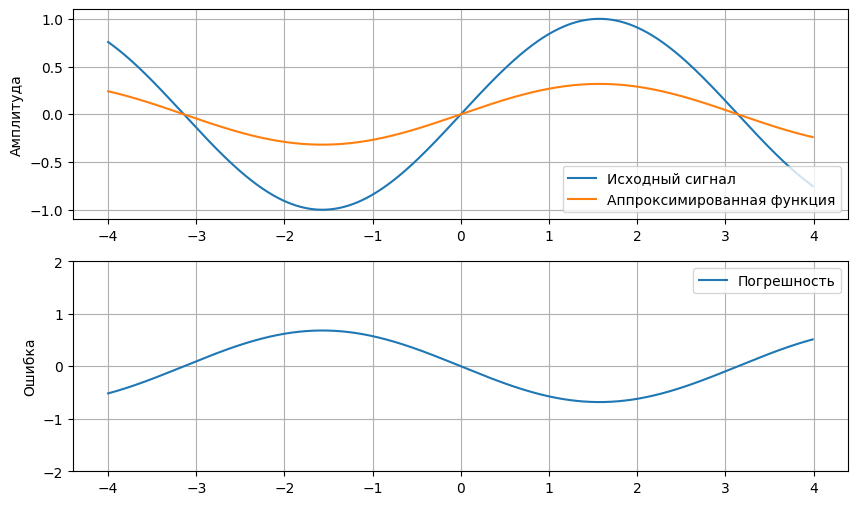

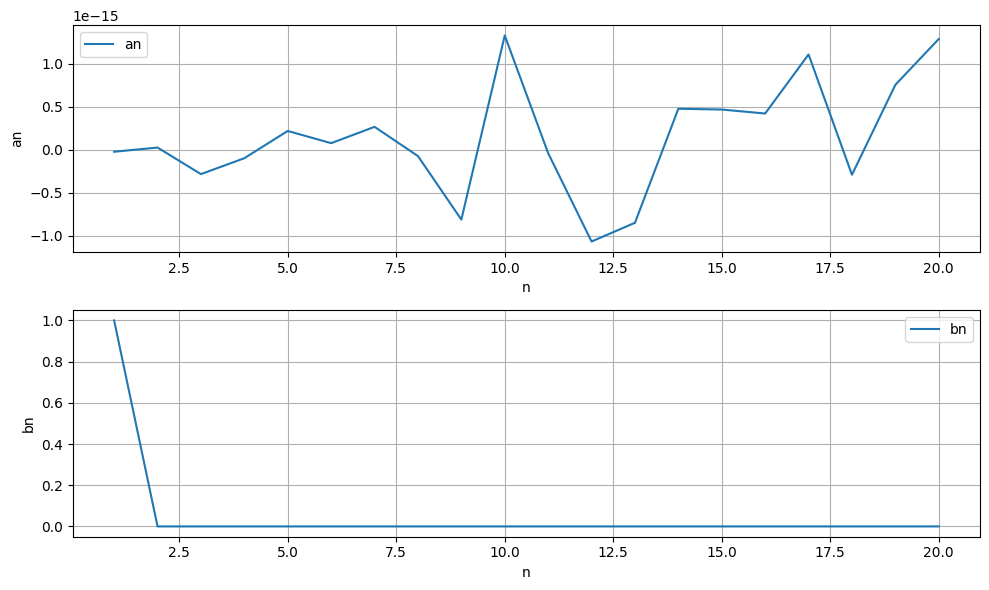

In [ ]:
def sinn(x):
  return math.sin(x)

fourier_sin = Fourier(sinn, A=2, T=2*math.pi, N=20, lower_bound=-4, higher_bound=4)
fourier_sin.show()

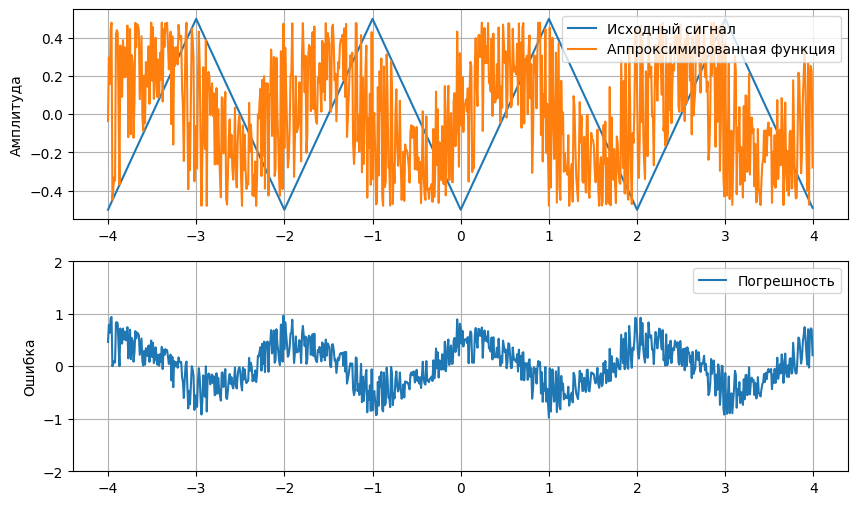

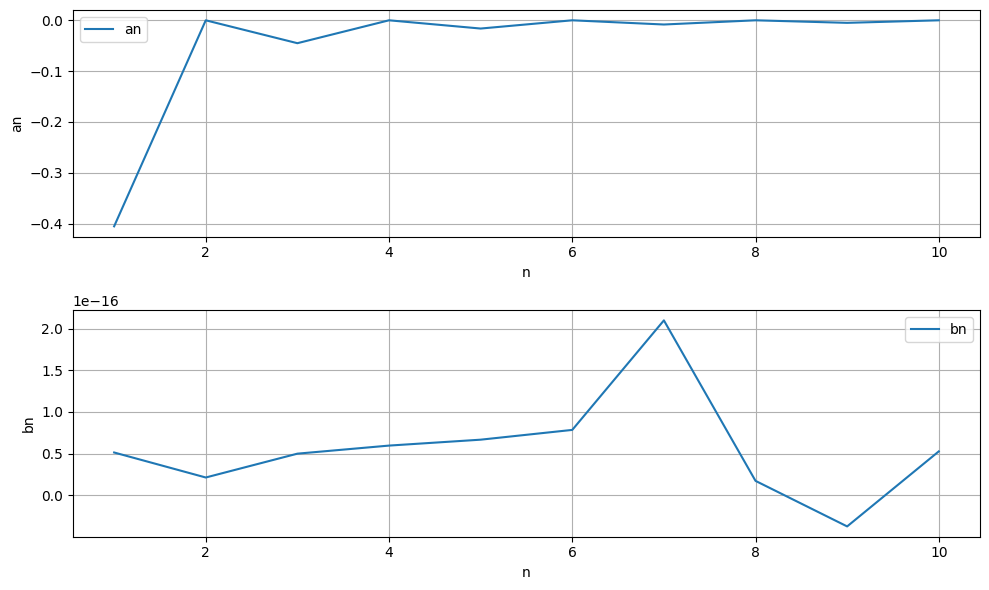

In [ ]:
def tri(x, T = 2):
  x = x%T
  if (2 * (x / T) - 1) >= 0:
    return 0.5 - (2 * (x / T) - 1)
  else:
    return 0.5 + (2 * (x / T) - 1)

fourier_tri = Fourier(tri, A=1, T=2, N=10, lower_bound=-4, higher_bound=4)
fourier_tri.show()

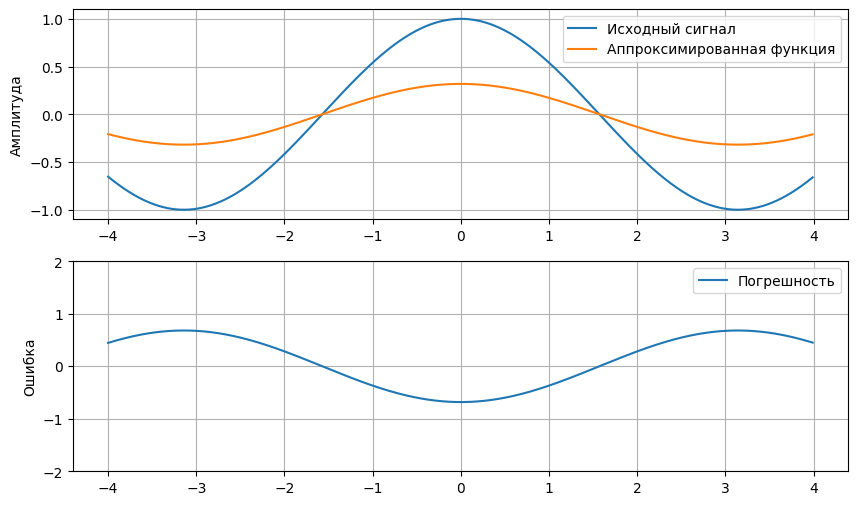

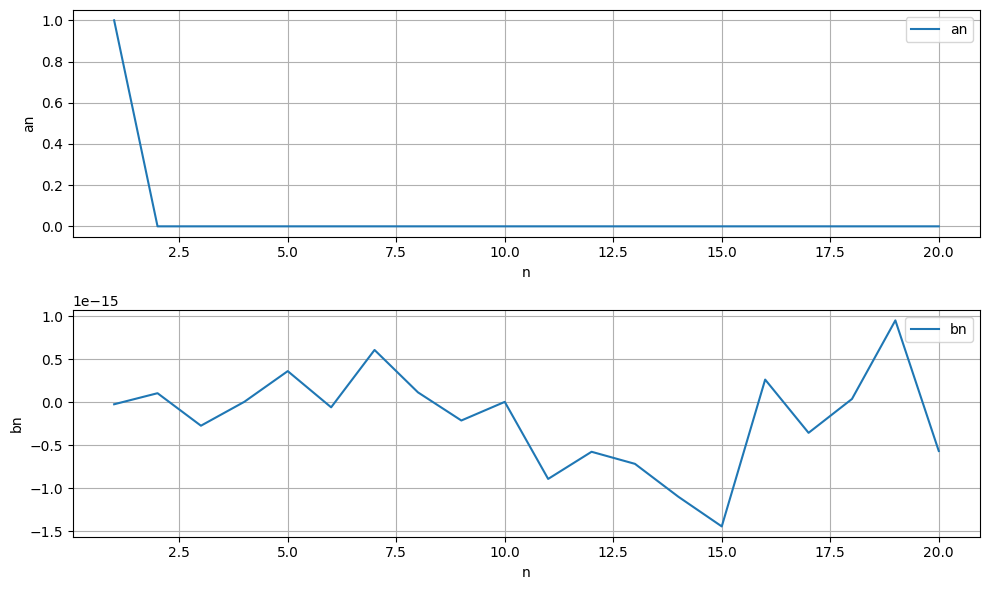

<Figure size 640x480 with 0 Axes>

In [ ]:
def tri(x, T = 2):
  return math.cos(x)

fourier_tri = Fourier(tri, A=1, T=2*math.pi, N=20, lower_bound=-4, higher_bound=4)
fourier_tri.show()